In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

import numpy as np
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

import os
os.environ["PROJ_LIB"]='C:/Users/Chavez/AppData/Local/Programs/Python/Python38-32/lib/site-packages/pyproj/proj_dir/share/proj'
#os.environ["PROJ_LIB"]='C:/Users/Chavez/anaconda3/pkgs/basemap-1.2.1-py38h79c95a4_1/Library/share/basemap'
#os.environ['PROJ_LIB']='C:/Users/Chavez/anaconda3/Lib/site-packages/mpl_toolkits/basemap'
#os.environ['PROJ_LIB']='C:/Users/Chavez/anaconda3/pkgs/proj4-5.2.0-h6538335_1006/Library/share'
from mpl_toolkits.basemap import Basemap

from wrf import to_np, getvar, smooth2d, get_basemap, latlon_coords, interplevel, get_cartopy, cartopy_xlim, cartopy_ylim


Bad key "text.kerning_factor" on line 4 in
C:\Users\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
%matplotlib inline
from math import*
from scipy import stats
import matplotlib.pyplot as plt
from pylab import*
from scipy.stats import norm

In [3]:
from math import*
from numpy import*
from pylab import *
from scipy.stats import norm
import pandas as pd

In [4]:
# Open D02
file1 = Dataset("wrfout_d02_1")
file2 = Dataset("wrfout_d02_2")
file3 = Dataset("wrfout_d02_3")
file4 = Dataset("wrfout_d02_4")
file5 = Dataset("wrfout_d02_5")
file6 = Dataset("wrfout_d02_6")
file7 = Dataset("wrfout_d02_7")
file8 = Dataset("wrfout_d02_8")
file9 = Dataset("wrfout_d02_9")

# TEMPERATUR 2M

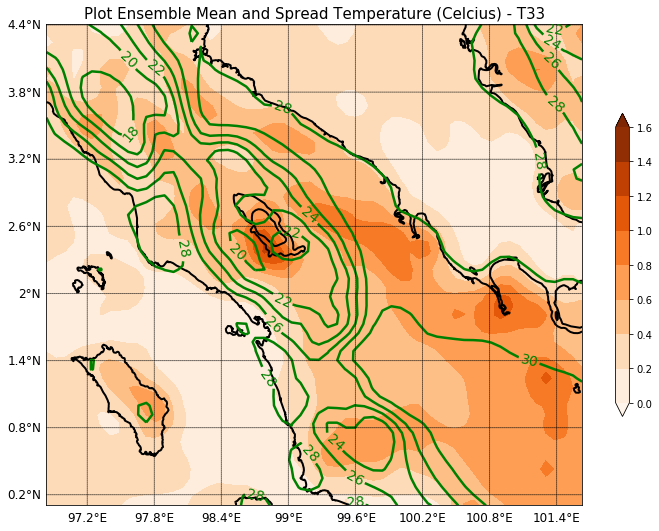

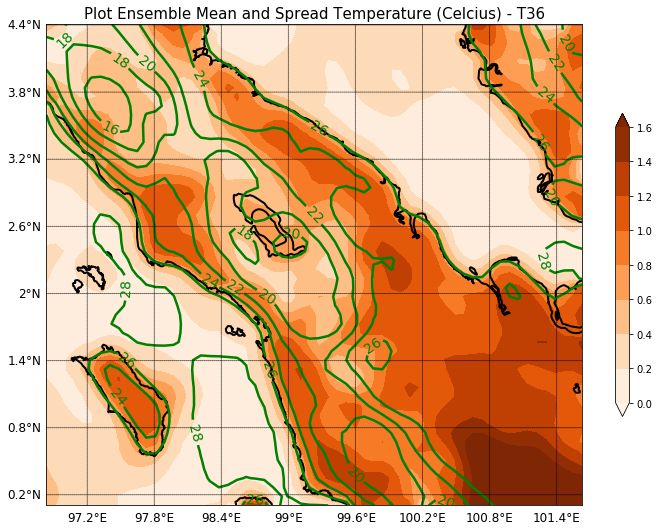

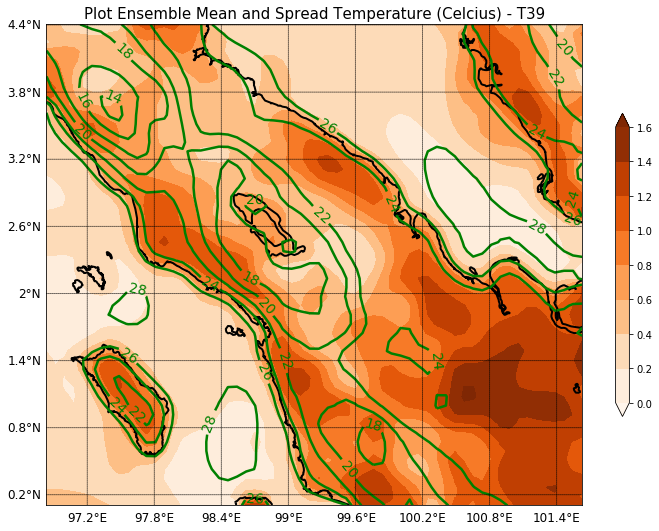

In [34]:
levels = np.array([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6])
for time in np.arange (33,42,3):
    xx = int(time)
    T11 = getvar(file1,"T2",xx)
    T12 = getvar(file2,"T2",xx)
    T13 = getvar(file3,"T2",xx)
    T14 = getvar(file4,"T2",xx)
    T21 = getvar(file5,"T2",xx)
    T22 = getvar(file6,"T2",xx)
    T23 = getvar(file7,"T2",xx)
    T31 = getvar(file8,"T2",xx)
    T32 = getvar(file9,"T2",xx)
    
    data=np.empty([9,54,60])              
    data[0,:,:]=T11
    data[1,:,:]=T12
    data[2,:,:]=T13
    data[3,:,:]=T14
    data[4,:,:]=T21
    data[5,:,:]=T22
    data[6,:,:]=T23
    data[7,:,:]=T31
    data[8,:,:]=T32
    
    rata = np.nanmean(data,axis=0)
    T_rata = rata - 273.15
    T_std = np.std(data,axis=0)

    # Smooth the sea level pressure since it tends to be noisy near the mountains
    smooth_T_rata = smooth2d(to_np(T_rata), 3)
    smooth_T_std = smooth2d(to_np(T_std), 3)

    # Get the latitude and longitude points
    lats, lons = latlon_coords(T11)

    # Get the basemap object
    bm = get_basemap(T11, resolution = 'h')

    # Create a figure
    fig = plt.figure(figsize=(12,9))
    
    parallels = np.arange(-1,5, 0.6)
    meridians = np.arange(96,102, 0.6)
    

    bm.drawparallels(parallels,labels=[1,0,0,0],fontsize=12,color='black')
    bm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12,color='black')

    # Add geographic outlines
    bm.drawcoastlines(linewidth=2)
    bm.drawstates(linewidth=2)
    bm.drawcountries(linewidth=2)

    # Convert the lats and lons to x and y.  Make sure you convert the lats and lons to
    # numpy arrays via to_np, or basemap crashes with an undefined RuntimeError.
    x, y = bm(to_np(lons), to_np(lats))

    # Draw the contours and filled contours
    CS = bm.contourf(x, y, to_np(smooth_T_std))
    #plt.clabel(CS, inline=1, fontsize=10)
    cmap=get_cmap('Oranges')
    #cmap.set_over('maroon')
    #cmap.set_under('white')
    cb = bm.contourf(x, y, to_np(smooth_T_std), levels=levels, cmap=cmap,extend='both')
    
    #lev=[15,30,45,60,75]
    lev=[15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
    mean_T= bm.contour(x, y, to_np(smooth_T_rata), colors='green', linewidths=2.5)
   
    # Add a color bar
    plt.clabel(mean_T, inline=1, fontsize=14, fmt="%1.0f")
    plt.colorbar(cb, shrink=.62)
    plt.title("Plot Ensemble Mean and Spread Temperature (Celcius) - T" + str(xx), size=15)
    plt.show()

    fig.savefig('temp_'+str(xx) +'.png')

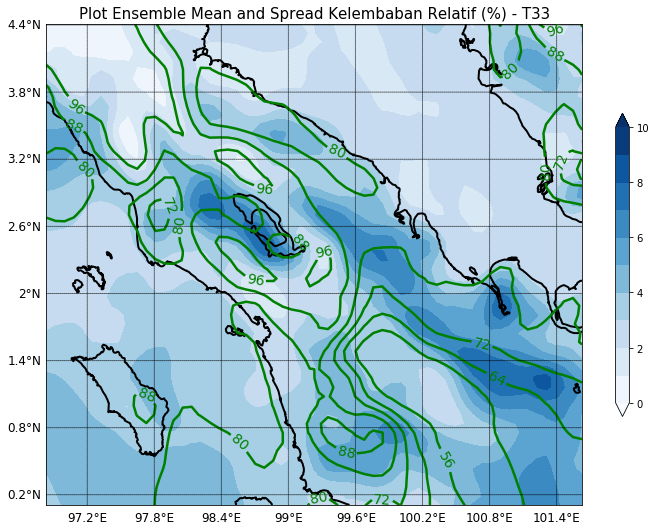

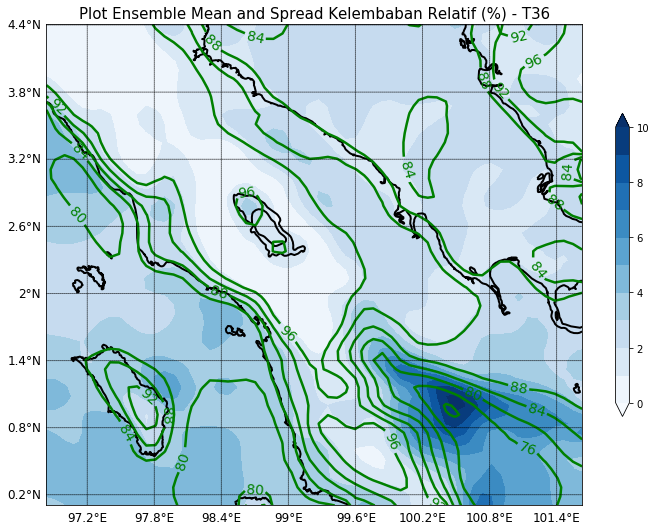

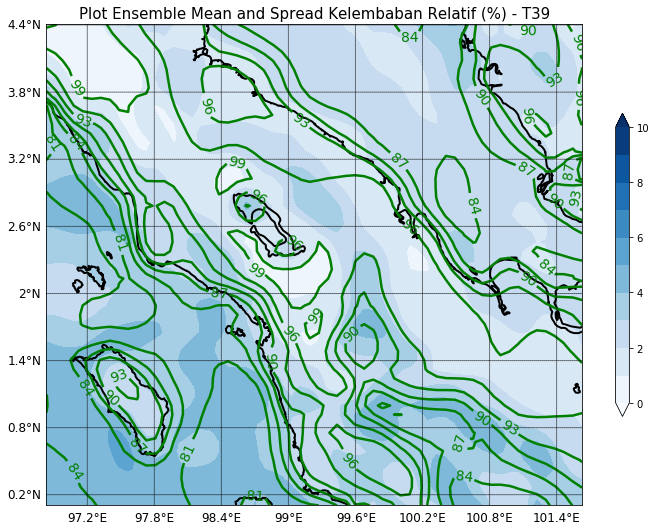

In [37]:
levels = np.array([0,1,2,3,4,5,6,7,8,9,10])
for time in np.arange (33,42,3):
    xx = int(time)
    T11 = getvar(file1,"rh2",xx)
    T12 = getvar(file2,"rh2",xx)
    T13 = getvar(file3,"rh2",xx)
    T14 = getvar(file4,"rh2",xx)
    T21 = getvar(file5,"rh2",xx)
    T22 = getvar(file6,"rh2",xx)
    T23 = getvar(file7,"rh2",xx)
    T31 = getvar(file8,"rh2",xx)
    T32 = getvar(file9,"rh2",xx)
    
    data=np.empty([9,54,60])              
    data[0,:,:]=T11
    data[1,:,:]=T12
    data[2,:,:]=T13
    data[3,:,:]=T14
    data[4,:,:]=T21
    data[5,:,:]=T22
    data[6,:,:]=T23
    data[7,:,:]=T31
    data[8,:,:]=T32
    
    rata = np.nanmean(data,axis=0)
    rh_rata = rata
    rh_std = np.std(data,axis=0)

    # Smooth the sea level pressure since it tends to be noisy near the mountains
    smooth_rh_rata = smooth2d(to_np(rh_rata), 3)
    smooth_rh_std = smooth2d(to_np(rh_std), 3)

    # Get the latitude and longitude points
    lats, lons = latlon_coords(T11)

    # Get the basemap object
    bm = get_basemap(T11, resolution = 'h')

    # Create a figure
    fig = plt.figure(figsize=(12,9))
    
    parallels = np.arange(-1,5, 0.6)
    meridians = np.arange(96,102, 0.6)
    

    bm.drawparallels(parallels,labels=[1,0,0,0],fontsize=12,color='black')
    bm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12,color='black')

    # Add geographic outlines
    bm.drawcoastlines(linewidth=2)
    bm.drawstates(linewidth=2)
    bm.drawcountries(linewidth=2)

    # Convert the lats and lons to x and y.  Make sure you convert the lats and lons to
    # numpy arrays via to_np, or basemap crashes with an undefined RuntimeError.
    x, y = bm(to_np(lons), to_np(lats))

    # Draw the contours and filled contours
    CS = bm.contourf(x, y, to_np(smooth_rh_std))
    #plt.clabel(CS, inline=1, fontsize=10)
    cmap=get_cmap('Blues')
    #cmap.set_over('maroon')
    #cmap.set_under('white')
    cb = bm.contourf(x, y, to_np(smooth_rh_std), levels=levels, cmap=cmap,extend='both')
    
    #lev=[15,30,45,60,75]
    lev=[60,65,70,75,80,85,90,95,100]
    mean_rh= bm.contour(x, y, to_np(smooth_rh_rata), colors='green', linewidths=2.5)
   
    # Add a color bar
    plt.clabel(mean_rh, inline=1, fontsize=14, fmt="%1.0f")
    plt.colorbar(cb, shrink=.62)
    plt.title("Plot Ensemble Mean and Spread Kelembaban Relatif (%) - T" + str(xx), size=15)
    plt.show()

    fig.savefig('RH_'+str(xx) +'.png')

# GEOPOTENTIAL

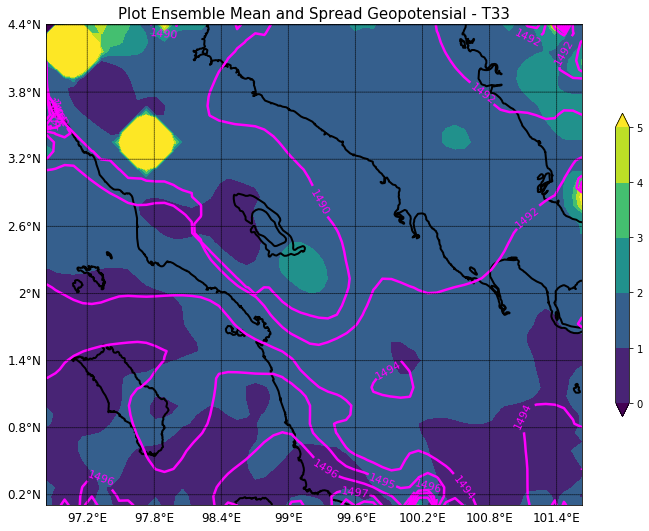

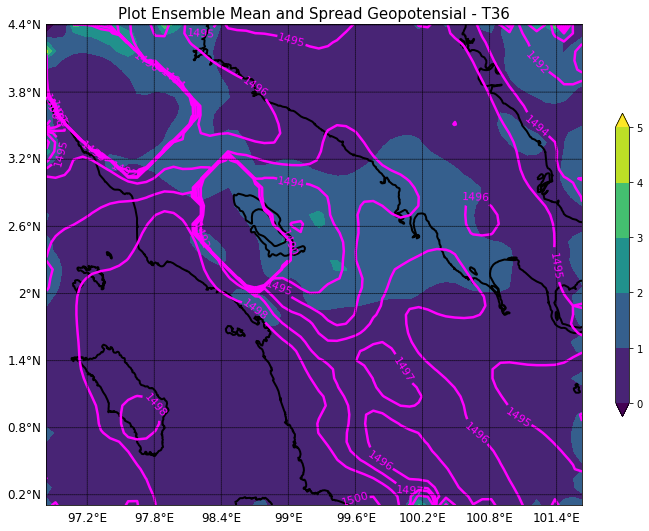

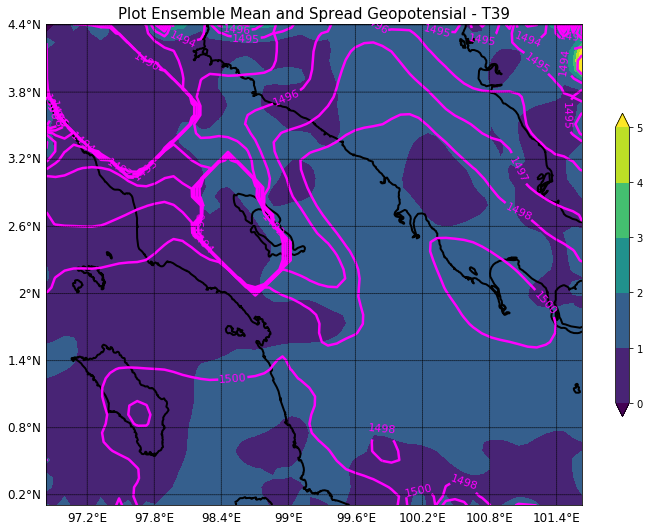

In [11]:
levels = np.array([0,1,2,3,4,5])
for time in np.arange (33,42,3):
    xx = int(time)
    Z11 = getvar(file1,"z",units='m',timeidx=xx)
    Z12 = getvar(file2,"z",units='m',timeidx=xx)
    Z13 = getvar(file3,"z",units='m',timeidx=xx)
    Z14 = getvar(file4,"z",units='m',timeidx=xx)
    Z21 = getvar(file5,"z",units='m',timeidx=xx)
    Z22 = getvar(file6,"z",units='m',timeidx=xx)
    Z23 = getvar(file7,"z",units='m',timeidx=xx)
    Z31 = getvar(file8,"z",units='m',timeidx=xx)
    Z32 = getvar(file9,"z",units='m',timeidx=xx)
    
    P11 = getvar(file1,"p",units='hpa',timeidx=xx)
    P12 = getvar(file2,"p",units='hpa',timeidx=xx)
    P13 = getvar(file3,"p",units='hpa',timeidx=xx)
    P14 = getvar(file4,"p",units='hpa',timeidx=xx)
    P21 = getvar(file5,"p",units='hpa',timeidx=xx)
    P22 = getvar(file6,"p",units='hpa',timeidx=xx)
    P23 = getvar(file7,"p",units='hpa',timeidx=xx)
    P31 = getvar(file8,"p",units='hpa',timeidx=xx)
    P32 = getvar(file9,"p",units='hpa',timeidx=xx)
    
    ht11_850 = interplevel(Z11, P11, 850).fillna(0)
    ht12_850 = interplevel(Z12, P12, 850).fillna(0)
    ht13_850 = interplevel(Z13, P13, 850).fillna(0)
    ht14_850 = interplevel(Z14, P14, 850).fillna(0)
    ht21_850 = interplevel(Z21, P21, 850).fillna(0)
    ht22_850 = interplevel(Z22, P22, 850).fillna(0)
    ht23_850 = interplevel(Z23, P23, 850).fillna(0)
    ht31_850 = interplevel(Z31, P31, 850).fillna(0)
    ht32_850 = interplevel(Z32, P32, 850).fillna(0)

    ht8=np.empty([9,54,60])              
    ht8[0,:,:]=ht11_850
    ht8[1,:,:]=ht12_850
    ht8[2,:,:]=ht13_850
    ht8[3,:,:]=ht14_850
    ht8[4,:,:]=ht21_850
    ht8[5,:,:]=ht22_850
    ht8[6,:,:]=ht23_850
    ht8[7,:,:]=ht31_850
    ht8[8,:,:]=ht32_850
    
    ht8_rata = np.nanmean(ht8,axis=0)
    ht8_stdev = np.std(ht8,axis=0)
    
    smooth8_ht = smooth2d(to_np(ht8_rata), 3)
    smooth8_sht = smooth2d(to_np(ht8_stdev), 3)
    # Get the latitude and longitude points
    lats, lons = latlon_coords(P11)

    # Get the basemap object
    bm = get_basemap(P11, resolution = 'h')
    fig = plt.figure(figsize=(12,9))
    
    parallels = np.arange(-1,5, 0.6)
    meridians = np.arange(96,102, 0.6)

    bm.drawparallels(parallels,labels=[1,0,0,0],fontsize=12,color='black')
    bm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12,color='black')
           
    # Add geographic outlines
    bm.drawcoastlines(linewidth=2)
    bm.drawstates(linewidth=2)
    bm.drawcountries(linewidth=2)

    # Convert the lats and lons to x and y.  Make sure you convert the lats and lons to
    # numpy arrays via to_np, or basemap crashes with an undefined RuntimeError.
    x, y = bm(to_np(lons), to_np(lats))

    CS = bm.contourf(x, y, to_np(smooth8_sht))
    #plt.clabel(CS, inline=1, fontsize=10)
    #plt.contour(to_np(lons), to_np(lats), to_np(ht_500), levels=levels, colors="black",
    #                   transform=crs.PlateCarree())
    cmap=get_cmap('viridis')
    #cmap.set_over('black')
    #cmap.set_under('white')
    cb=bm.contourf(x, y, to_np(smooth8_sht), levels=levels, cmap=cmap,extend='both')
    
    lev=[1490,1492,1494,1495,1496,1497,1498,1500]
    meanHT= bm.contour(x, y, to_np(smooth8_ht), lev, colors='magenta', linewidths=2.5)
    
    plt.clabel(meanHT, inline=1, fontsize=11, fmt="%1.0f")
    plt.colorbar(cb, shrink=.62)
    plt.title("Plot Ensemble Mean and Spread Geopotensial - T" + str(xx), size=15)
    plt.show()

    fig.savefig('geop850_t'+str(xx) +'.png')

# HUJAN

In [14]:
times1 = getvar(file1,"Times")
rainc1 = getvar(file1, "RAINC") # accumulated total cumulus precip
rainnc1 = getvar(file1, "RAINNC") # accumulated total grid scale precip

times2 = getvar(file2,"Times")
rainc2 = getvar(file2, "RAINC") # accumulated total cumulus precip
rainnc2 = getvar(file2, "RAINNC") # accumulated total grid scale precip

times3 = getvar(file3,"Times")
rainc3 = getvar(file3, "RAINC") # accumulated total cumulus precip
rainnc3 = getvar(file3, "RAINNC") # accumulated total grid scale precip

times4 = getvar(file4,"Times")
rainc4 = getvar(file4, "RAINC") # accumulated total cumulus precip
rainnc4 = getvar(file4, "RAINNC") # accumulated total grid scale precip

times5 = getvar(file5,"Times")
rainc5 = getvar(file5, "RAINC") # accumulated total cumulus precip
rainnc5 = getvar(file5, "RAINNC") # accumulated total grid scale precip

times6 = getvar(file6,"Times")
rainc6 = getvar(file6, "RAINC") # accumulated total cumulus precip
rainnc6 = getvar(file6, "RAINNC") # accumulated total grid scale precip

times7 = getvar(file7,"Times")
rainc7 = getvar(file7, "RAINC") # accumulated total cumulus precip
rainnc7 = getvar(file7, "RAINNC") # accumulated total grid scale precip

times8 = getvar(file8,"Times")
rainc8 = getvar(file8, "RAINC") # accumulated total cumulus precip
rainnc8 = getvar(file8, "RAINNC") # accumulated total grid scale precip

times9 = getvar(file9,"Times")
rainc9 = getvar(file9, "RAINC") # accumulated total cumulus precip
rainnc9 = getvar(file9, "RAINNC") # accumulated total grid scale precip

In [15]:
a={}
b={}
c={}
d={}
e={}
f={}
g={}
h={}
i={}
j={}
k={}
l={}
m={}
n={}
o={}
p={}
q={}
r={}
z={}

for x in range (0,73):
    a["rainc{0}".format(x)]=getvar(file1, "RAINC", int(x))
    a["rainnc{0}".format(x)]=getvar(file1, "RAINNC", int(x))
    c["rainc{0}".format(x)]=getvar(file2, "RAINC", int(x))
    c["rainnc{0}".format(x)]=getvar(file2, "RAINNC", int(x))
    e["rainc{0}".format(x)]=getvar(file3, "RAINC", int(x))
    e["rainnc{0}".format(x)]=getvar(file3, "RAINNC", int(x))
    g["rainc{0}".format(x)]=getvar(file4, "RAINC", int(x))
    g["rainnc{0}".format(x)]=getvar(file4, "RAINNC", int(x))
    i["rainc{0}".format(x)]=getvar(file5, "RAINC", int(x))
    i["rainnc{0}".format(x)]=getvar(file5, "RAINNC", int(x))
    k["rainc{0}".format(x)]=getvar(file6, "RAINC", int(x))
    k["rainnc{0}".format(x)]=getvar(file6, "RAINNC", int(x))
    m["rainc{0}".format(x)]=getvar(file7, "RAINC", int(x))
    m["rainnc{0}".format(x)]=getvar(file7, "RAINNC", int(x))
    o["rainc{0}".format(x)]=getvar(file8, "RAINC", int(x))
    o["rainnc{0}".format(x)]=getvar(file8, "RAINNC", int(x))
    q["rainc{0}".format(x)]=getvar(file9, "RAINC", int(x))
    q["rainnc{0}".format(x)]=getvar(file9, "RAINNC", int(x))
    
    
b["cumrain0"]=a["rainc0"]+a["rainnc0"]
d["cumrain0"]=c["rainc0"]+c["rainnc0"]
f["cumrain0"]=e["rainc0"]+e["rainnc0"]   
h["cumrain0"]=g["rainc0"]+g["rainnc0"]  
j["cumrain0"]=i["rainc0"]+i["rainnc0"]   
l["cumrain0"]=k["rainc0"]+k["rainnc0"]   
n["cumrain0"]=m["rainc0"]+m["rainnc0"]
p["cumrain0"]=o["rainc0"]+o["rainnc0"]  
r["cumrain0"]=q["rainc0"]+q["rainnc0"]

In [16]:
for x in range(1,73):
    b["cumrain{0}".format(x)]=a["rainc{0}".format(x)]+a["rainnc{0}".format(x)]-(a["rainc{0}".format(x-1)]+a["rainnc{0}".format(x-1)])
    d["cumrain{0}".format(x)]=c["rainc{0}".format(x)]+c["rainnc{0}".format(x)]-(c["rainc{0}".format(x-1)]+c["rainnc{0}".format(x-1)])
    f["cumrain{0}".format(x)]=e["rainc{0}".format(x)]+e["rainnc{0}".format(x)]-(e["rainc{0}".format(x-1)]+e["rainnc{0}".format(x-1)])
    h["cumrain{0}".format(x)]=g["rainc{0}".format(x)]+g["rainnc{0}".format(x)]-(g["rainc{0}".format(x-1)]+g["rainnc{0}".format(x-1)])
    j["cumrain{0}".format(x)]=i["rainc{0}".format(x)]+i["rainnc{0}".format(x)]-(i["rainc{0}".format(x-1)]+i["rainnc{0}".format(x-1)])
    l["cumrain{0}".format(x)]=k["rainc{0}".format(x)]+k["rainnc{0}".format(x)]-(k["rainc{0}".format(x-1)]+k["rainnc{0}".format(x-1)])
    n["cumrain{0}".format(x)]=m["rainc{0}".format(x)]+m["rainnc{0}".format(x)]-(m["rainc{0}".format(x-1)]+m["rainnc{0}".format(x-1)])
    p["cumrain{0}".format(x)]=o["rainc{0}".format(x)]+o["rainnc{0}".format(x)]-(o["rainc{0}".format(x-1)]+o["rainnc{0}".format(x-1)])
    r["cumrain{0}".format(x)]=q["rainc{0}".format(x)]+q["rainnc{0}".format(x)]-(q["rainc{0}".format(x-1)]+q["rainnc{0}".format(x-1)])
    #z["cumrain{0}".format(x)] = (b["cumrain{0}".format(x)]+d["cumrain{0}".format(x)]+f["cumrain{0}".format(x)]+h["cumrain{0}".format(x)]+j["cumrain{0}".format(x)]+l["cumrain{0}".format(x)]+n["cumrain{0}".format(x)]+p["cumrain{0}".format(x)]+r["cumrain{0}".format(x)])/9

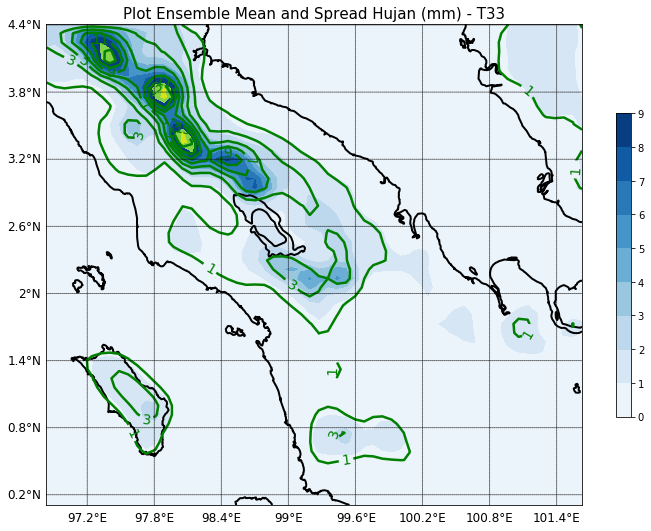

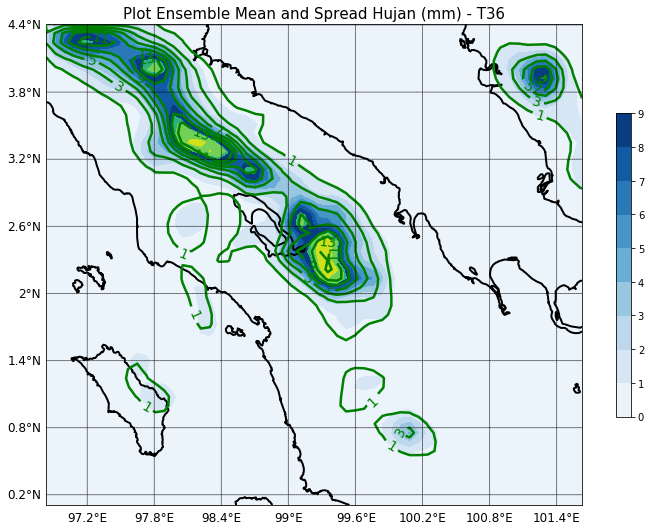

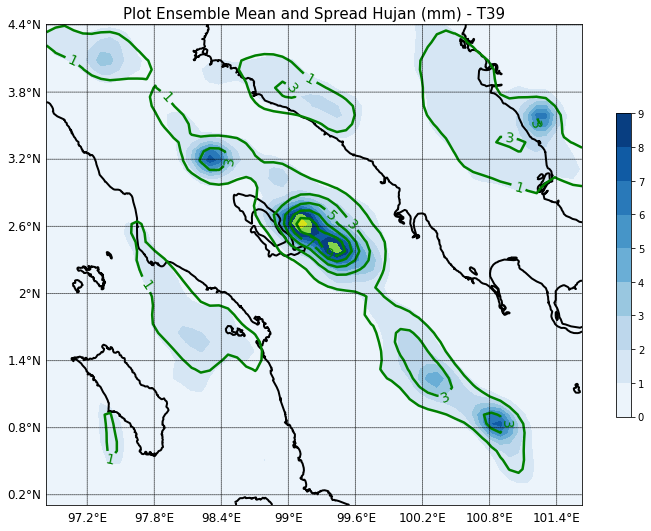

In [28]:
levels = np.arange(0,10)
for time in np.arange (33,42,3):
    xx=int(time)
    data=np.empty([9,54,60])  
    data[0,:,:]=b["cumrain{0}".format(time)]
    data[1,:,:]=d["cumrain{0}".format(time)]
    data[2,:,:]=f["cumrain{0}".format(time)]
    data[3,:,:]=h["cumrain{0}".format(time)]
    data[4,:,:]=j["cumrain{0}".format(time)]
    data[5,:,:]=l["cumrain{0}".format(time)]
    data[6,:,:]=n["cumrain{0}".format(time)]
    data[7,:,:]=p["cumrain{0}".format(time)]
    data[8,:,:]=r["cumrain{0}".format(time)]

    rain_rata = np.nanmean(data,axis=0)
    rain_std = np.std(data,axis=0)
    
    # Smooth the sea level pressure since it tends to be noisy near the mountains
    smooth_rain_rata = smooth2d(to_np(rain_rata), 3)
    smooth_rain_std = smooth2d(to_np(rain_std), 3)

    # Get the latitude and longitude points
    lats, lons = latlon_coords(rainc1)

    # Get the basemap object
    bm = get_basemap(rainc1, resolution = 'h')

    # Create a figure
    fig = plt.figure(figsize=(12,9))
    
    parallels = np.arange(-1,5, 0.6)
    meridians = np.arange(96,102, 0.6)

    bm.drawparallels(parallels,labels=[1,0,0,0],fontsize=12,color='black')
    bm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12,color='black')

    # Add geographic outlines
    bm.drawcoastlines(linewidth=2)
    bm.drawstates(linewidth=2)
    bm.drawcountries(linewidth=2)

    # Convert the lats and lons to x and y. Make sure you convert the lats and lons to
    # numpy arrays via to_np, or basemap crashes with an undefined RuntimeError.
    x, y = bm(to_np(lons), to_np(lats))

    # Draw the contours and filled contours
    CS = bm.contourf(x, y, to_np(smooth_rain_std))
    cb = bm.contourf(x, y, to_np(smooth_rain_std), levels=levels, cmap=get_cmap("Blues"))
    
    lev=[1,3,5,7,9,11,13]
    mean_rain= bm.contour(x, y, to_np(smooth_rain_rata), lev, colors='green', linewidths=2.5)
    
    plt.clabel(mean_rain, inline=1, fontsize=14, fmt="%1.0f")
    
    # Add a color bar
    plt.colorbar(cb, shrink=.62)
    plt.title("Plot Ensemble Mean and Spread Hujan (mm) - T" + str(xx), size=15)
    plt.show()

    fig.savefig('hujan_'+str(xx) +'.png')

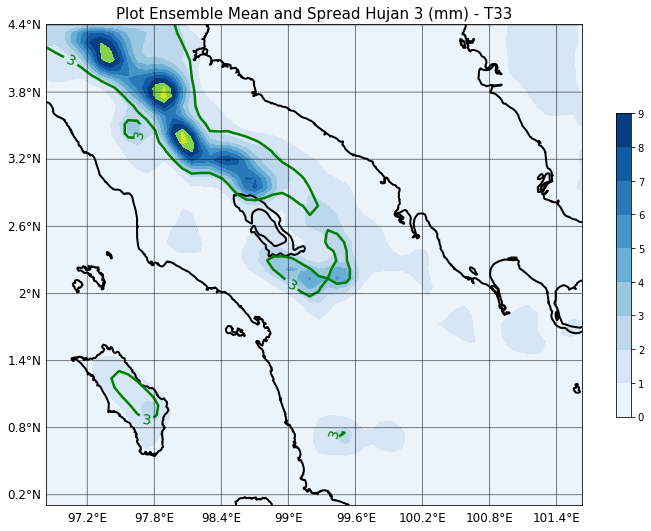

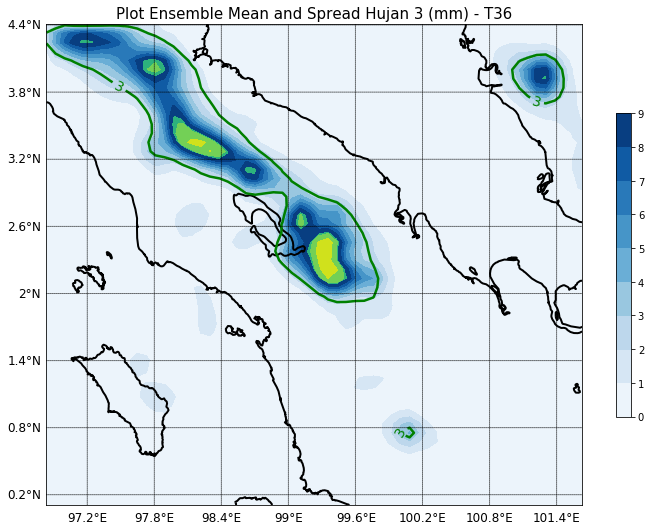

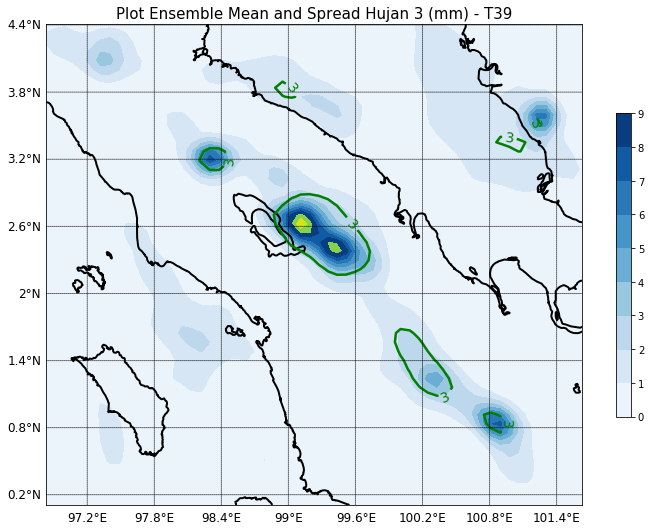

In [29]:
levels = np.arange(0,10)
for time in np.arange (33,42,3):
    xx=int(time)
    data=np.empty([9,54,60])  
    data[0,:,:]=b["cumrain{0}".format(time)]
    data[1,:,:]=d["cumrain{0}".format(time)]
    data[2,:,:]=f["cumrain{0}".format(time)]
    data[3,:,:]=h["cumrain{0}".format(time)]
    data[4,:,:]=j["cumrain{0}".format(time)]
    data[5,:,:]=l["cumrain{0}".format(time)]
    data[6,:,:]=n["cumrain{0}".format(time)]
    data[7,:,:]=p["cumrain{0}".format(time)]
    data[8,:,:]=r["cumrain{0}".format(time)]

    rain_rata = np.nanmean(data,axis=0)
    rain_std = np.std(data,axis=0)
    
    # Smooth the sea level pressure since it tends to be noisy near the mountains
    smooth_rain_rata = smooth2d(to_np(rain_rata), 3)
    smooth_rain_std = smooth2d(to_np(rain_std), 3)

    # Get the latitude and longitude points
    lats, lons = latlon_coords(rainc1)

    # Get the basemap object
    bm = get_basemap(rainc1, resolution = 'h')

    # Create a figure
    fig = plt.figure(figsize=(12,9))
    
    parallels = np.arange(-1,5, 0.6)
    meridians = np.arange(96,102, 0.6)

    bm.drawparallels(parallels,labels=[1,0,0,0],fontsize=12,color='black')
    bm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12,color='black')

    # Add geographic outlines
    bm.drawcoastlines(linewidth=2)
    bm.drawstates(linewidth=2)
    bm.drawcountries(linewidth=2)

    # Convert the lats and lons to x and y. Make sure you convert the lats and lons to
    # numpy arrays via to_np, or basemap crashes with an undefined RuntimeError.
    x, y = bm(to_np(lons), to_np(lats))

    # Draw the contours and filled contours
    CS = bm.contourf(x, y, to_np(smooth_rain_std))
    cb = bm.contourf(x, y, to_np(smooth_rain_std), levels=levels, cmap=get_cmap("Blues"))
    
    lev=[3]
    mean_rain= bm.contour(x, y, to_np(smooth_rain_rata), lev, colors='green', linewidths=2.5)
    
    plt.clabel(mean_rain, inline=1, fontsize=14, fmt="%1.0f")
    
    # Add a color bar
    plt.colorbar(cb, shrink=.62)
    plt.title("Plot Ensemble Mean and Spread Hujan 3 (mm) - T" + str(xx), size=15)
    plt.show()

    fig.savefig('hujan3mm_'+str(xx) +'.png')

# WINDSHEAR

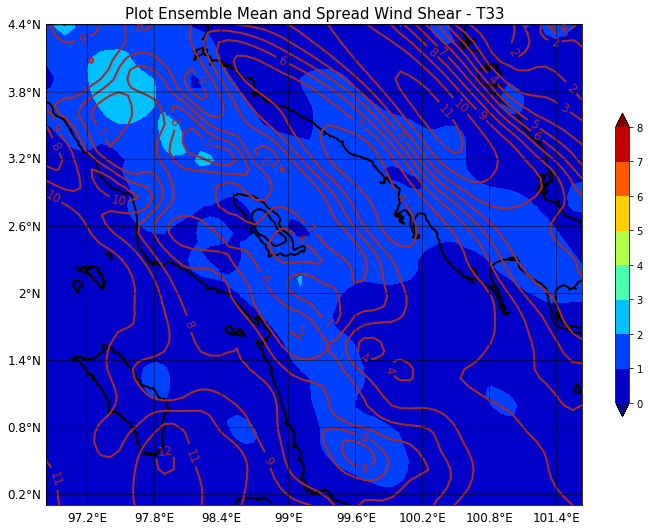

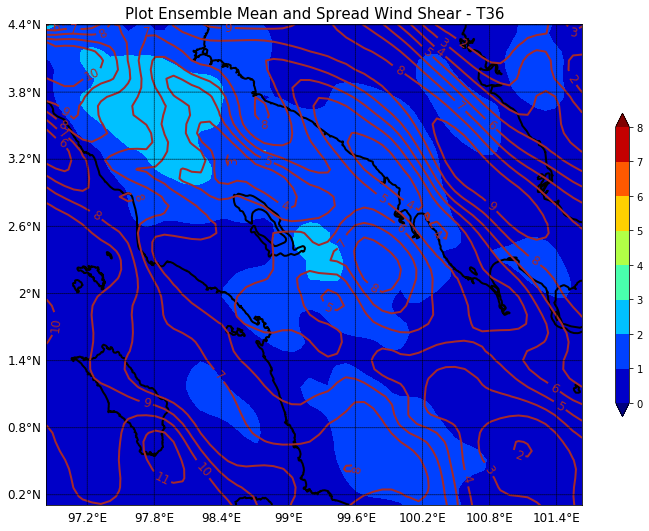

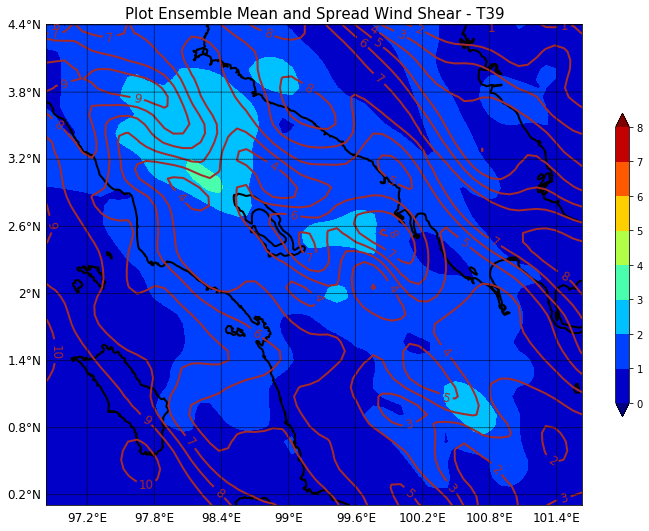

In [19]:
levels = np.array([0,1,2,3,4,5,6,7,8])
for time in np.arange(33,42,3):
    xx = int(time)
    U11 = getvar(file1,"ua",timeidx=xx)
    U12 = getvar(file2,"ua",timeidx=xx)
    U13 = getvar(file3,"ua",timeidx=xx)
    U14 = getvar(file4,"ua",timeidx=xx)
    U21 = getvar(file5,"ua",timeidx=xx)
    U22 = getvar(file6,"ua",timeidx=xx)
    U23 = getvar(file7,"ua",timeidx=xx)
    U31 = getvar(file8,"ua",timeidx=xx)
    U32 = getvar(file9,"ua",timeidx=xx)
    
    V11 = getvar(file1,"va",timeidx=xx)
    V12 = getvar(file2,"va",timeidx=xx)
    V13 = getvar(file3,"va",timeidx=xx)
    V14 = getvar(file4,"va",timeidx=xx)
    V21 = getvar(file5,"va",timeidx=xx)
    V22 = getvar(file6,"va",timeidx=xx)
    V23 = getvar(file7,"va",timeidx=xx)
    V31 = getvar(file8,"va",timeidx=xx)
    V32 = getvar(file9,"va",timeidx=xx)
    
    P11 = getvar(file1,"p",units='hpa',timeidx=xx)
    P12 = getvar(file2,"p",units='hpa',timeidx=xx)
    P13 = getvar(file3,"p",units='hpa',timeidx=xx)
    P14 = getvar(file4,"p",units='hpa',timeidx=xx)
    P21 = getvar(file5,"p",units='hpa',timeidx=xx)
    P22 = getvar(file6,"p",units='hpa',timeidx=xx)
    P23 = getvar(file7,"p",units='hpa',timeidx=xx)
    P31 = getvar(file8,"p",units='hpa',timeidx=xx)
    P32 = getvar(file9,"p",units='hpa',timeidx=xx)
    
    uu11_850 = interplevel(U11, P11, 850).fillna(0)
    vv11_850 = interplevel(V11, P11, 850).fillna(0)
    uu12_850 = interplevel(U12, P12, 850).fillna(0)
    vv12_850 = interplevel(V12, P12, 850).fillna(0)  
    uu13_850 = interplevel(U13, P13, 850).fillna(0)
    vv13_850 = interplevel(V13, P13, 850).fillna(0)
    uu14_850 = interplevel(U14, P14, 850).fillna(0)
    vv14_850 = interplevel(V14, P14, 850).fillna(0)
    uu21_850 = interplevel(U21, P21, 850).fillna(0)
    vv21_850 = interplevel(V21, P21, 850).fillna(0)
    uu22_850 = interplevel(U22, P22, 850).fillna(0)
    vv22_850 = interplevel(V22, P22, 850).fillna(0)
    uu23_850 = interplevel(U23, P23, 850).fillna(0)
    vv23_850 = interplevel(V23, P23, 850).fillna(0)
    uu31_850 = interplevel(U31, P31, 850).fillna(0)
    vv31_850 = interplevel(V31, P31, 850).fillna(0)
    uu32_850 = interplevel(U32, P32, 850).fillna(0)
    vv32_850 = interplevel(V32, P32, 850).fillna(0)
    
    uu11_500 = interplevel(U11, P11, 500).fillna(0)
    vv11_500 = interplevel(V11, P11, 500).fillna(0)
    uu12_500 = interplevel(U12, P12, 500).fillna(0)
    vv12_500 = interplevel(V12, P12, 500).fillna(0)  
    uu13_500 = interplevel(U13, P13, 500).fillna(0)
    vv13_500 = interplevel(V13, P13, 500).fillna(0)
    uu14_500 = interplevel(U14, P14, 500).fillna(0)
    vv14_500 = interplevel(V14, P14, 500).fillna(0)
    uu21_500 = interplevel(U21, P21, 500).fillna(0)
    vv21_500 = interplevel(V21, P21, 500).fillna(0)
    uu22_500 = interplevel(U22, P22, 500).fillna(0)
    vv22_500 = interplevel(V22, P22, 500).fillna(0)
    uu23_500 = interplevel(U23, P23, 500).fillna(0)
    vv23_500 = interplevel(V23, P23, 500).fillna(0)
    uu31_500 = interplevel(U31, P31, 500).fillna(0)
    vv31_500 = interplevel(V31, P31, 500).fillna(0)
    uu32_500 = interplevel(U32, P32, 500).fillna(0)
    vv32_500 = interplevel(V32, P32, 500).fillna(0)
    
    duv11 = np.sqrt(((uu11_850-vv11_850)**2)+((uu11_500-vv11_500)**2))
    duv12 = np.sqrt(((uu12_850-vv12_850)**2)+((uu12_500-vv12_500)**2))
    duv13 = np.sqrt(((uu13_850-vv13_850)**2)+((uu13_500-vv13_500)**2))
    duv14 = np.sqrt(((uu14_850-vv14_850)**2)+((uu14_500-vv14_500)**2))
    duv21 = np.sqrt(((uu21_850-vv21_850)**2)+((uu21_500-vv21_500)**2))
    duv22 = np.sqrt(((uu22_850-vv22_850)**2)+((uu22_500-vv22_500)**2))
    duv23 = np.sqrt(((uu23_850-vv23_850)**2)+((uu23_500-vv23_500)**2))
    duv31 = np.sqrt(((uu31_850-vv31_850)**2)+((uu31_500-vv31_500)**2))
    duv32 = np.sqrt(((uu32_850-vv32_850)**2)+((uu32_500-vv32_500)**2))
    
    swind=np.empty([9,54,60])              
    swind[0,:,:]=duv11
    swind[1,:,:]=duv12
    swind[2,:,:]=duv13
    swind[3,:,:]=duv14
    swind[4,:,:]=duv21
    swind[5,:,:]=duv22
    swind[6,:,:]=duv23
    swind[7,:,:]=duv31
    swind[8,:,:]=duv32
    
    wind=np.empty([9,54,60])              
    wind[0,:,:]=duv11
    wind[1,:,:]=duv12
    wind[2,:,:]=duv13
    wind[3,:,:]=duv14
    wind[4,:,:]=duv21
    wind[5,:,:]=duv22
    wind[6,:,:]=duv23
    wind[7,:,:]=duv31
    wind[8,:,:]=duv32

    duv = np.mean(wind,axis=0)
    sduv = np.std(swind,axis=0)
    
    smoothSDUV = smooth2d(sduv, 3)
    smoothDUV = smooth2d(duv, 3)
    # Get the latitude and longitude points
    lats, lons = latlon_coords(U11)

    # Get the basemap object
    bm = get_basemap(U11, resolution = 'h')

    # Create a figure
    fig = plt.figure(figsize=(12,9))

    parallels = np.arange(-1,5, 0.6)
    meridians = np.arange(96,102, 0.6)

    bm.drawparallels(parallels,labels=[1,0,0,0],fontsize=12,color='black')
    bm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12,color='black')
    
    # Add geographic outlines
    bm.drawcoastlines(linewidth=2)
    bm.drawstates(linewidth=2)
    bm.drawcountries(linewidth=2)

    x, y = bm(to_np(lons), to_np(lats))
    
    CS = bm.contourf(x, y, to_np(smoothSDUV))
    
    cmap=get_cmap('jet')
    #cmap.set_over('maroon')
    #cmap.set_under('white')
    cb = bm.contourf(x, y, to_np(smoothSDUV), levels=levels, cmap=cmap,extend='both')
    lev=[1,2,3,4,5,6,7,8,9,10,11,12,13]
    meanWS= bm.contour(x, y, to_np(smoothDUV), lev, colors='brown', linewidths=2)
    
    plt.clabel(meanWS, inline=1, fontsize=12, fmt="%i")
    plt.colorbar(cb, shrink=.62)
    plt.title("Plot Ensemble Mean and Spread Wind Shear - T" + str(xx), size=15)
    plt.show()
    
    fig.savefig('windshear-t'+str(xx) +'.png')